In [54]:
import numpy as np
import pickle
import math
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def one_hot(y, n_labels):
    mat = np.zeros((len(y), n_labels))
    for i, val in enumerate(y):
        mat[i, val] = 1
    return mat


In [55]:
class Layer:

    def __init__(self, n_input, n_neurons, init, activation=None, weights=None, bias=None):
        #initializing weights
        self.shape = (n_input, n_neurons)
        if (weights is not None):
            self.weights = weights
        else:
            if (init == "random"):
                self.weights = np.random.uniform(-1.0, 1.0, size=(self.shape[0], self.shape[1]))
            #    self.weights = np.random.rand(self.shape[0], self.shape[1])
            if (init == "zero"):
                self.weights = MyNeuralNetwork.zero_init(self.shape)
            if (init == "normal"):
                self.weights = np.random.normal(0, 0.01, size=(self.shape[0], self.shape[1]))

        self.activation = activation
        self.bias = bias if bias is not None else np.zeros(n_neurons)               #initializing bias = 0
        self.last_activation = None
        self.error = None
        self.delta = None
        self.n_input = n_input
        self.n_neurons = n_neurons

In [56]:
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """
        self.layer_sizes = layer_sizes
        self.n_layers = n_layers
        self.activation = activation
        self.learning_rate = learning_rate
        self.weight_init = weight_init
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.layers = []
        for i in range(len(self.layer_sizes) - 1):
            self.layers.append(Layer(self.layer_sizes[i], self.layer_sizes[i + 1], self.weight_init, self.activation))

        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        pass

    def feed_forward(self, X):
#        i = 0
        for layer in self.layers:
#            print(net_input.shape)
            if (layer == self.layers[-1]):
                x1 = np.dot(X, layer.weights) + layer.bias
                layer.last_activation =  self.softmax(x1)
                X = layer.last_activation
            elif (layer == self.layers[0]):
                X = X.T
                X = self.activate(X, layer)
            else:
                X = self.activate(X, layer)

        return X

    def activate(self, x, layer):
#        print(layer.weights.shape)
        x1 = np.dot(x, layer.weights) + layer.bias
    #    x1 = layer.weights.dot(x) + layer.bias

        if (self.activation == "sigmoid"):
            layer.last_activation =  self.sigmoid(x1)
            return layer.last_activation
        elif (self.activation == "tanh"):
            layer.last_activation =  self.tanh(x1)
            return layer.last_activation
        elif (self.activation == "relu"):
            layer.last_activation =  self.relu(x1)
            return layer.last_activation
        elif (self.activation == "softmax"):
            layer.last_activation =  self.softmax(x1)
            return layer.last_activation
        elif (self.activation == "linear"):
            layer.last_activation =  self.linear(x1)
            return layer.last_activation

    def apply_activation_derivative(self, x1, layer):
        
        if (self.activation == "sigmoid"):
            return self.sigmoid_grad(x1)
        elif (self.activation == "tanh"):
            return self.tanh_grad(x1)
        elif (self.activation == "relu"):
            return self.relu_grad(x1)
        elif (self.activation == "softmax"):
            return self.softmax_grad(x1)
        elif (self.activation == "linear"):
            return self.linear_grad(x1)


    def relu(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.maximum(0,X)

    def relu_grad(self, X):
        """
        Calculating the gradient of ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        X[X<=0] = 0
        X[X>0] = 1
        return X


    def sigmoid(self, X):
        """
        Calculating the Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return 1 / (1 + np.exp(-X))

    def sigmoid_grad(self, X):
        """
        Calculating the gradient of Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """

        return X * (1 - X)

    def linear(self, X):
        """
        Calculating the Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return X

    def linear_grad(self, X):
        """
        Calculating the gradient of Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.ones(X.shape)

    def tanh(self, X):
        """
        Calculating the Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.tanh(X)

    def tanh_grad(self, X):
        """
        Calculating the gradient of Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return 1 - X ** 2

    def softmax(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        
        expX = np.exp(X)
        return np.exp(X) / np.sum(np.exp(X))

    def softmax_grad(self, X, i):
        """
        Calculating the gradient of Softmax activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        exps = np.exp(X)
        """ if (i >= 7):
            print(X.shape) """
        return exps / np.sum(exps) * (1 - exps / np.sum(exps))

    def zero_init(self, shape):
        """
        Calculating the initial weights after Zero Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        f = list()
        for i in range(shape[0]):
            fs = np.zeros(shape[1])
            f.append(fs)
        f = np.array(f)
        return f

    def random_init(self, shape):
        """
        Calculating the initial weights after Random Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return np.random.rand(shape[0], shape[1])

    def normal_init(self, shape):
        """
        Calculating the initial weights after Normal(0,1) Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return np.random.normal(0.5, 0.01, size=(shape[0], shape[1]))

    
    def backpropagation(self, X, y, i):
        """
        Performs the backward propagation algorithm and updates the layers weights.
        :param X: The input values.
        :param y: The target values.
        :param float learning_rate: The learning rate (between 0 and 1).
        """

        # Feed forward for the output
        output = self.feed_forward(X)
        output_before_updating = output.copy()
        y = y.T
        # Loop over the layers backward
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]

            # If this is the output layer
            if layer == self.layers[-1]:
                layer.error = y - output
                
                # The output = layer.last_activation in this case
                layer.delta = layer.error * self.softmax_grad(output, i)

            else:
                next_layer = self.layers[i + 1]
            #    layer.error = next_layer.delta.T.dot(next_layer.weights)
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * self.apply_activation_derivative(layer.last_activation, layer)

        # Update the weights
        for i in range(len(self.layers)):
            layer = self.layers[i]
            # The input is either the previous layers output or X itself (for the first hidden layer)
            input_to_use = np.atleast_2d(X if i == 0 else self.layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * self.learning_rate
        
        return output_before_updating
        
    def cross_entropy(self, outputs, y_target):
        return -np.sum(np.log(outputs) * y_target)
    
    def error(self, y, output):
        error = self.cross_entropy(output, y)
        return 0.5 * np.mean(error)
    
    
    
    def fit(self, X, y):
        X_data_1, y_data_1 = X.copy(), y.copy()
        X_data, y_data = X_data_1[:9000], y_data_1[:9000]
        X_val, y_val_2 = X_data_1[9001:9601], y_data_1[9001:9601]
        y_data_enc = one_hot(y_data, 10)
        y_val = one_hot(y_val_2, 10)
        X_mbs = np.array_split(X_data, self.batch_size)
        y_mbs = np.array_split(y_data_enc, self.batch_size)
        self.errs = []
        self.errs_val = []
        learning_rate = self.learning_rate
        
        for i in range(self.num_epochs):
            
            ep_err=[]
            ep_val_err = []

            for Xi, yi in zip(X_mbs, y_mbs):
                err_small = []
                for X_one, y_one in zip(Xi, yi):
                    output = self.backpropagation(X_one, y_one, i)
                    error = self.error(y_one, output)
                    err_small.append(error)
                epoch_error_train = np.mean(err_small)
                ep_err.append(epoch_error_train)
            for Xv, yv in zip(X_val, y_val):
                val_ans = self.feed_forward(Xv)
                error_val = self.error(yv, val_ans)
                ep_val_err.append(error_val)
            valErr = np.mean(ep_val_err)
                
                
                
            print('Epoch: #%s, Cross Error: %f, Val Error: %f' % (i, float(epoch_error_train * 100), float(valErr * 100)))
            self.errs.append(np.mean(ep_err))
            self.errs_val.append(valErr)


        # fit function has to return an instance of itself or else it won't work with test.py
        return self

    def predict_proba(self, X):
        """
        Predicting probabilities using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the 
            class wise prediction probabilities.
        """

        # return the numpy array y which contains the predicted values
        y = []
        for i in X:
            ff = self.feed_forward(i)
            ff2 = np.exp(ff) / np.sum(np.exp(ff))
            y.append(ff2)
        return np.array(y)

    def predict(self, X):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """

        # return the numpy array y which contains the predicted values
        y = []
        for i in X:
            ff = self.feed_forward(i)
            y.append(np.argmax(ff))
        return np.array(y)

    def mle(self, y, axis=1):
        return np.argmax(y, axis)

    def score(self, X, y):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.

        Returns
        -------
        acc : float value specifying the accuracy of the model on the provided testing set
        """

        # return the numpy array y which contains the predicted values
        y_hat = self.predict(X)
        self.val_loss = []

        #print(y_hat.shape)
        #print(y.shape)
        print('Score: %.2f%%' % (self.accuracy(y_hat, y.flatten()) * 100))
        return y_hat
    
    def plt_tsne(self, )

    @staticmethod
    def accuracy(y_pred, y_true):
        #print(type(y_true))
        return (np.round(y_pred,1)== y_true).mean()

SyntaxError: invalid syntax (<ipython-input-56-29e0d06f51b0>, line 454)

In [57]:
sizes = [784, 256, 128, 64, 10]

with open('train_set.pkl', 'rb') as f:
    data_train = pickle.load(f)
with open('test_set.pkl', 'rb') as f:
    data_test = pickle.load(f)
X_train_1, Y_train = data_train.iloc[:, 0], data_train.iloc[:, 1]
X_test_1, Y_test = data_test.iloc[:, 0], data_test.iloc[:, 1]

#Training data preprocessing
X_image_train = []
for i in range(X_train_1.shape[0]):
    npdata = np.asarray(X_train_1[i])
    X_image_train.append(npdata)
X_image_train = np.array(X_image_train)

X_train = []
for i in range(X_image_train.shape[0]):
    temp = X_image_train[i]
    temp = temp.flatten()
    X_train.append(temp)
X_train = np.array(X_train)
X_train = X_train / 255

#Testing data preprocessing
X_image_test = []
for i in range(X_test_1.shape[0]):
    npdata = np.asarray(X_test_1[i])
    X_image_test.append(npdata)
X_image_test = np.array(X_image_test)

X_test = []
for i in range(X_image_test.shape[0]):
    temp = X_image_test[i]
    temp = temp.flatten()
    X_test.append(temp)
X_test = np.array(X_test)
X_test = X_test / 255

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [5]:
sigmoid = MyNeuralNetwork(5, sizes, "sigmoid", 0.1, "normal", 70, 100)
sigmoid.fit(X_train, Y_train)
y_s = sigmoid.score(X_test, Y_test)

Epoch: #0, Cross Error: 113.311468, Val Error: 113.476648
Epoch: #1, Cross Error: 114.402527, Val Error: 114.535567
Epoch: #2, Cross Error: 115.017416, Val Error: 115.157781
Epoch: #3, Cross Error: 115.297841, Val Error: 115.481891
Epoch: #4, Cross Error: 115.437887, Val Error: 115.677396
Epoch: #5, Cross Error: 115.524248, Val Error: 115.816424
Epoch: #6, Cross Error: 115.592711, Val Error: 115.930598
Epoch: #7, Cross Error: 115.657872, Val Error: 116.034798
Epoch: #8, Cross Error: 115.725940, Val Error: 116.136431
Epoch: #9, Cross Error: 115.799907, Val Error: 116.239550
Epoch: #10, Cross Error: 115.881736, Val Error: 116.346898
Epoch: #11, Cross Error: 115.973460, Val Error: 116.461038
Epoch: #12, Cross Error: 116.077846, Val Error: 116.584949
Epoch: #13, Cross Error: 116.198883, Val Error: 116.722328
Epoch: #14, Cross Error: 116.342558, Val Error: 116.878052
Epoch: #15, Cross Error: 116.518678, Val Error: 117.059363
Epoch: #16, Cross Error: 116.745178, Val Error: 117.278247
Epoch: 

In [7]:
relu = MyNeuralNetwork(5, sizes, "relu", 0.1, "normal", 70, 50)
relu.fit(X_train, Y_train)
y_r = relu.score(X_test, Y_test)

Epoch: #0, Cross Error: 22.930668, Val Error: 31.053051
Epoch: #1, Cross Error: 19.611941, Val Error: 21.703228
Epoch: #2, Cross Error: 11.349982, Val Error: 16.620218
Epoch: #3, Cross Error: 10.259530, Val Error: 15.123503
Epoch: #4, Cross Error: 7.117030, Val Error: 14.229079
Epoch: #5, Cross Error: 5.551355, Val Error: 18.260863
Epoch: #6, Cross Error: 5.615541, Val Error: 16.979856
Epoch: #7, Cross Error: 6.336290, Val Error: 15.651390
Epoch: #8, Cross Error: 4.267058, Val Error: 20.778101
Epoch: #9, Cross Error: 2.340999, Val Error: 17.421256
Epoch: #10, Cross Error: 2.305296, Val Error: 21.538636
Epoch: #11, Cross Error: 2.921354, Val Error: 18.908678
Epoch: #12, Cross Error: 1.013503, Val Error: 15.043501
Epoch: #13, Cross Error: 6.499416, Val Error: 17.626558
Epoch: #14, Cross Error: 0.905293, Val Error: 30.216687
Epoch: #15, Cross Error: 0.192085, Val Error: 25.832345
Epoch: #16, Cross Error: 2.403497, Val Error: 19.091431
Epoch: #17, Cross Error: 5.160418, Val Error: 20.30134

In [23]:
linear = MyNeuralNetwork(5, sizes, "linear", 0.002, "normal", 70, 100)
linear.fit(X_train, Y_train)
y_l = linear.score(X_test, Y_test)

Epoch: #0, Cross Error: 115.128065, Val Error: 115.128670
Epoch: #1, Cross Error: 115.127183, Val Error: 115.127906
Epoch: #2, Cross Error: 115.126292, Val Error: 115.127135
Epoch: #3, Cross Error: 115.125388, Val Error: 115.126354
Epoch: #4, Cross Error: 115.124466, Val Error: 115.125558
Epoch: #5, Cross Error: 115.123524, Val Error: 115.124745
Epoch: #6, Cross Error: 115.122554, Val Error: 115.123910
Epoch: #7, Cross Error: 115.121553, Val Error: 115.123049
Epoch: #8, Cross Error: 115.120515, Val Error: 115.122156
Epoch: #9, Cross Error: 115.119434, Val Error: 115.121228
Epoch: #10, Cross Error: 115.118303, Val Error: 115.120257
Epoch: #11, Cross Error: 115.117116, Val Error: 115.119239
Epoch: #12, Cross Error: 115.115864, Val Error: 115.118167
Epoch: #13, Cross Error: 115.114539, Val Error: 115.117032
Epoch: #14, Cross Error: 115.113130, Val Error: 115.115826
Epoch: #15, Cross Error: 115.111626, Val Error: 115.114540
Epoch: #16, Cross Error: 115.110014, Val Error: 115.113163
Epoch: 

In [9]:
tanh = MyNeuralNetwork(5, sizes, "tanh", 0.1, "normal", 70, 100)
tanh.fit(X_train, Y_train)
y_t = tanh.score(X_test, Y_test)

Epoch: #0, Cross Error: 89.206087, Val Error: 93.074263
Epoch: #1, Cross Error: 26.959550, Val Error: 35.884434
Epoch: #2, Cross Error: 16.732757, Val Error: 25.009929
Epoch: #3, Cross Error: 13.167549, Val Error: 19.855401
Epoch: #4, Cross Error: 9.563616, Val Error: 16.843645
Epoch: #5, Cross Error: 7.668093, Val Error: 17.519110
Epoch: #6, Cross Error: 5.718880, Val Error: 14.687201
Epoch: #7, Cross Error: 5.084689, Val Error: 19.010577
Epoch: #8, Cross Error: 5.179229, Val Error: 17.080120
Epoch: #9, Cross Error: 4.935442, Val Error: 15.890523
Epoch: #10, Cross Error: 1.867503, Val Error: 16.724440
Epoch: #11, Cross Error: 1.398245, Val Error: 16.541441
Epoch: #12, Cross Error: 2.278635, Val Error: 19.063762
Epoch: #13, Cross Error: 0.806293, Val Error: 15.854651
Epoch: #14, Cross Error: 0.825487, Val Error: 13.626508
Epoch: #15, Cross Error: 1.993833, Val Error: 18.692668
Epoch: #16, Cross Error: 1.569845, Val Error: 19.834157
Epoch: #17, Cross Error: 2.018243, Val Error: 21.02530

In [24]:
relu_errors = []
for i in relu.errs:
    relu_errors.append(i * 100)
relu_val_errors = []
for i in relu.errs_val:
    relu_val_errors.append(i * 100)

In [25]:
linear_errors = []
for i in linear.errs:
    linear_errors.append(i * 100)
linear_val_errors = []
for i in linear.errs_val:
    linear_val_errors.append(i * 100)

In [26]:
tanh_errors = []
for i in tanh.errs:
    tanh_errors.append(i * 100)
tanh_val_errors = []
for i in tanh.errs_val:
    tanh_val_errors.append(i * 100)

In [27]:
sigmoid_errors = []
for i in sigmoid.errs:
    sigmoid_errors.append(i * 100)
sigmoid_val_errors = []
for i in sigmoid.errs_val:
    sigmoid_val_errors.append(i * 100)

In [45]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 25.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.subplots_adjust(wspace =0, hspace =0.3)

<Figure size 720x1800 with 0 Axes>

Text(0, 0.5, 'Loss')

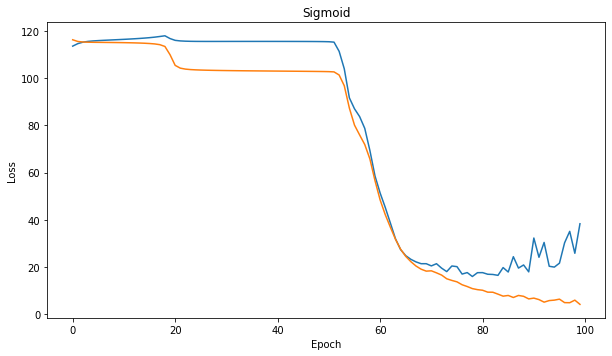

In [46]:
plt.subplot(4, 1, 1)
plt.plot(sigmoid_val_errors, label='Validation')
plt.plot(sigmoid_errors, label='Train')
plt.title('Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

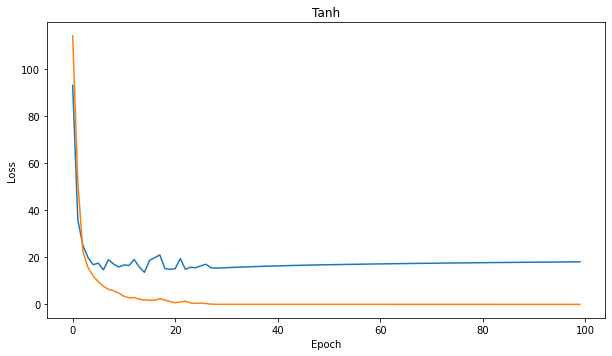

In [47]:
plt.subplot(4, 1, 2)
plt.plot(tanh_val_errors, label='Validation')
plt.plot(tanh_errors, label='Train')
plt.title('Tanh')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

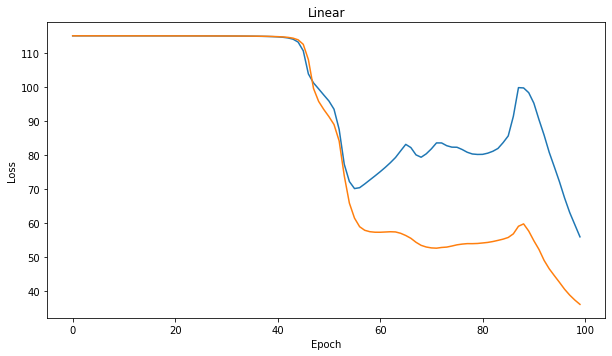

In [48]:
plt.subplot(4, 1, 3)
plt.plot(linear_val_errors, label='Validation')
plt.plot(linear_errors, label='Train')
plt.title('Linear')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

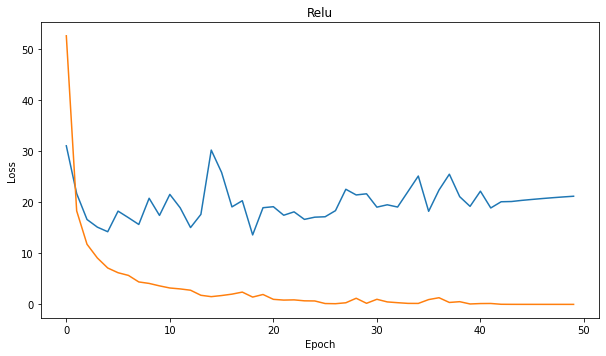

In [49]:
plt.subplot(4, 1, 1)
plt.plot(relu_val_errors, label='Validation')
plt.plot(relu_errors, label='Train')
plt.title('Relu')
plt.xlabel('Epoch')
plt.ylabel('Loss')